In [2]:
import pandas as pd
import numpy as np
from arch import arch_model
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# read a file from the parent directory
df = pd.read_csv('../processed_data/historical_data.csv', parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Stationarity Test
y = df.Imbalance
adf_test = adfuller(y)

if( adf_test[1] > 0.05):
    print("The series is non stationary. So we take first difference.")
    y = y.diff().dropna()
else:
    print("The series is stationary. No need to take first difference")

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

plt.plot(y)

plot_acf(y, lags=20)
plot_pacf(y, lags=20)

plt.show()

n_test = 12
train, test = y[:-n_test], y[-n_test:]

model = ARIMA(y, order=(2, 1, 0))
model_fit = model.fit()

yhat = model_fit.get_forecast(steps = n_test)

plt.plot(test.index, test, label='Imbalance')
plt.plot(test.index, yhat.predicted_mean, label='Predicted Imbalance', color='red')

model = arch_model(y.diff().dropna(), vol='Garch', p=10, q=10, mean='zero')  # mean = 'Zero' assumes you differenced it
model_fit = model.fit(disp="off")

plt.plot(yhat.variance.values[-1, :])
plt.plot(test.values**2, color='red')
plt.show()


The series is stationary. No need to take first difference
ADF Statistic: -37.35812699596468
p-value: 0.0


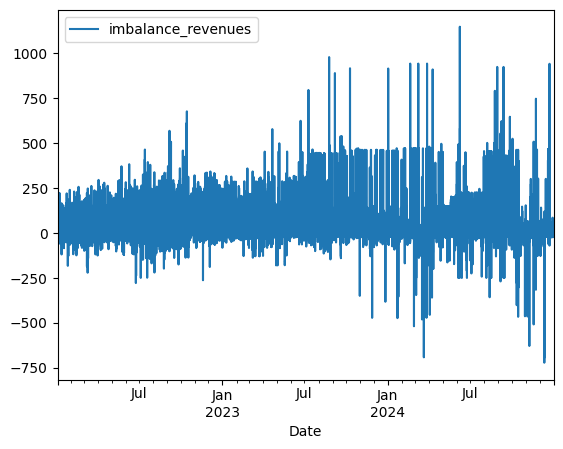

In [8]:
df = pd.read_csv('C:/Projects/Revenue Scenarios/BESS_Revenue_Scenarios/raw_data/15min_data_imbalance/assets/allocation_point_1/revenue_streams.csv.csv')[["Allocation point 1 - Imbalance shortage", "Allocation point 1 - Imbalance surplus", "Unnamed: 0"]]
df.set_index("Unnamed: 0", inplace=True)
df.index.rename("Date", inplace=True)
df["imbalance_revenues"] = df["Allocation point 1 - Imbalance shortage"] + df["Allocation point 1 - Imbalance surplus"]
df.drop(columns=["Allocation point 1 - Imbalance shortage", "Allocation point 1 - Imbalance surplus"], inplace=True)

#remove timezone information from index
df.index = pd.to_datetime(df.index)
df.index = df.index.tz_localize(None)
df.plot()

y = df.imbalance_revenues
adf_test = adfuller(y)

if( adf_test[1] > 0.05):
    print("The series is non stationary. So we take first difference.")
    y = y.diff().dropna()
else:
    print("The series is stationary. No need to take first difference")

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')


In [ ]:
plot_acf(y, lags=50)
plot_pacf(y, lags=50)

c:\Users\ArnauDuatisTarradell\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
c:\Users\ArnauDuatisTarradell\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ArnauDuatisTarradell\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


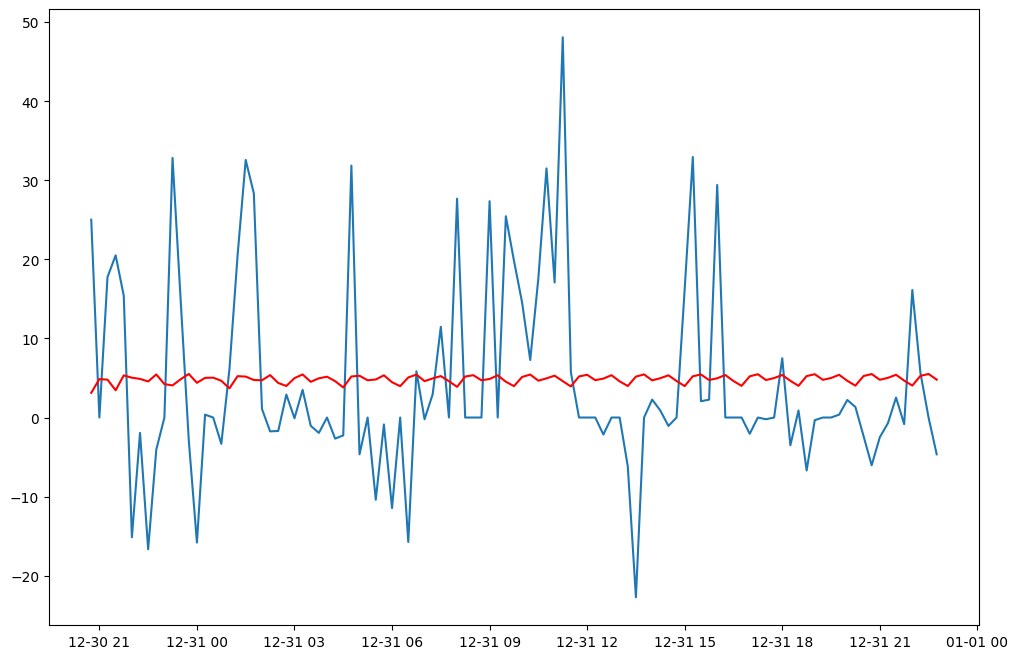

In [21]:
model = ARIMA(y, order=(2, 0, 3), seasonal_order = (1, 1, 1, 7), freq="15min")
model_fit = model.fit()

n_test = int(y.size / 1000)

train, test = y[:-n_test], y[-n_test:]

yhat = model_fit.get_forecast(steps = n_test)

plt.figure(figsize=(12, 8))
plt.plot(test.index, test, label='Imbalance')
plt.plot(test.index, yhat.predicted_mean, label='Predicted Imbalance', color='red')